# 주성분 분석

## 차원과 차원 축소
- ex. 과일 사진의 경우 10,000개의 픽셀로 이루어짐 => 10,000개의 특성을 가짐
- 즉, 머신러닝에서는 이런 특성을 <b>차원(dimension)</b> 이라고 함
- 차원을 줄일 수 있다면 저장공간을 크게 줄일 수 있음.

cf) 2차원 배열과 1차원 배열(벡터)에서 "차원"은 다른 의미이다!
    - 다차원 배열에서 차원 : 배열의 축의 개수
    - 1차원 배열, 즉 벡터일 경우 차원 : 원소의 개수

- 용량을 줄이기 위해 비지도 학습 작업 중 하나인 <b>차원 축소(dimensionality reduction)</b> 알고리즘을 사용해보자.
- 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법.
- 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음.
- 대표적인 차원 축소 알고리즘 : <b>주성분 분석(principal component analysis, PCA)</b>


## 주성분 분석 소개
- 데이터에 있는 분산이 큰 방향을 찾는 것. 
- 이 벡터를 <b>주성분(principal component)</b> 이라고 부름. 이 주성분 벡터는 원본 데이터에 있는 어떤 방향이라고 할 수 있다.
- 주성분 벡터의 원소 개수 == 원본 데이터셋에 있는 특성 개수
- 원본 데이터는 주성분을 사용해 차원을 줄일 수 있음.
- 일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.

## PCA 클래스

사이킷런으로 과일 사진 데이터에서 주성분 분석을 수행해보자!

In [2]:
import numpy as np
fruits = np.load('db/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
# 사이킷런은 sklearn.decomposition 모듈 아래에 PCA 클래스로 주성분 분석 알고리즘을 제공함.
# PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 함.
# k-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않음.

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
# 배열 크기 확인
print(pca.components_.shape)

# 위에서 n_components = 50 으로 지정했기 때문에 pca.components_ 배열의 첫번째 차원은 50. 즉, 50개의 주성분을 찾음.
# 두번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000

(50, 10000)


In [5]:
# Chapter06-2 에서 사용한 draw_fruits 함수
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수
    # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산.
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n개까지만 그림.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

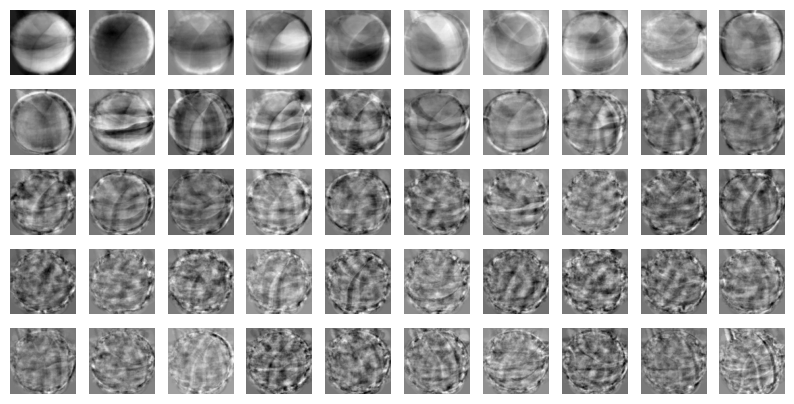

In [6]:
# 원본 데이터와 차원이 같으므로 주성분을 100*100 크기의 이미지처럼 출력 가능.

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
# 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것.
# 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있음. => PCA 의 transform() 메서드 사용.

print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

# 데이터를 성공적으로 줄임. (10,000개 => 50개)
# 다음은 원상복구 하는 방법에 대해 알아보자

(300, 50)


## 원본 데이터 재구성
- 앞서 10,000개의 특성을 50개로 줄이면서 어느정도 손실이 발생할 수 밖에 없음.
- 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성 할 수 있음 => inverse_transform() 메서드 사용

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


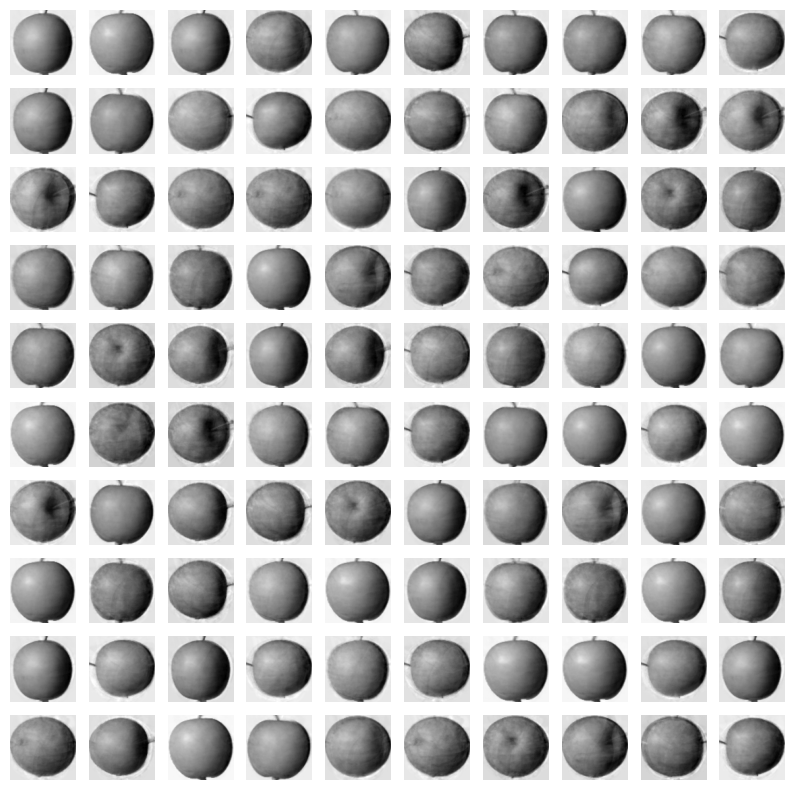

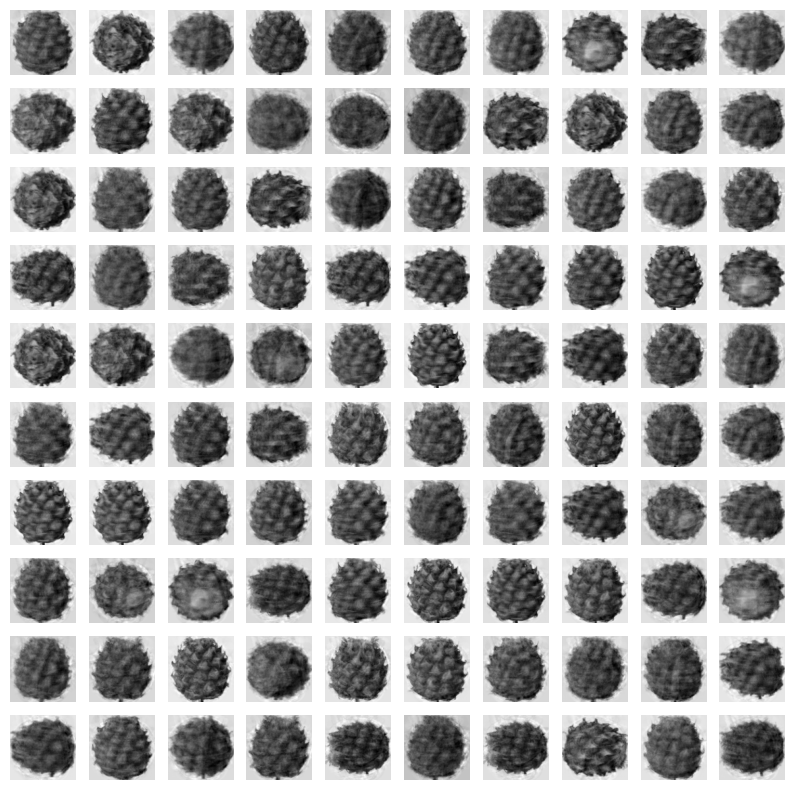

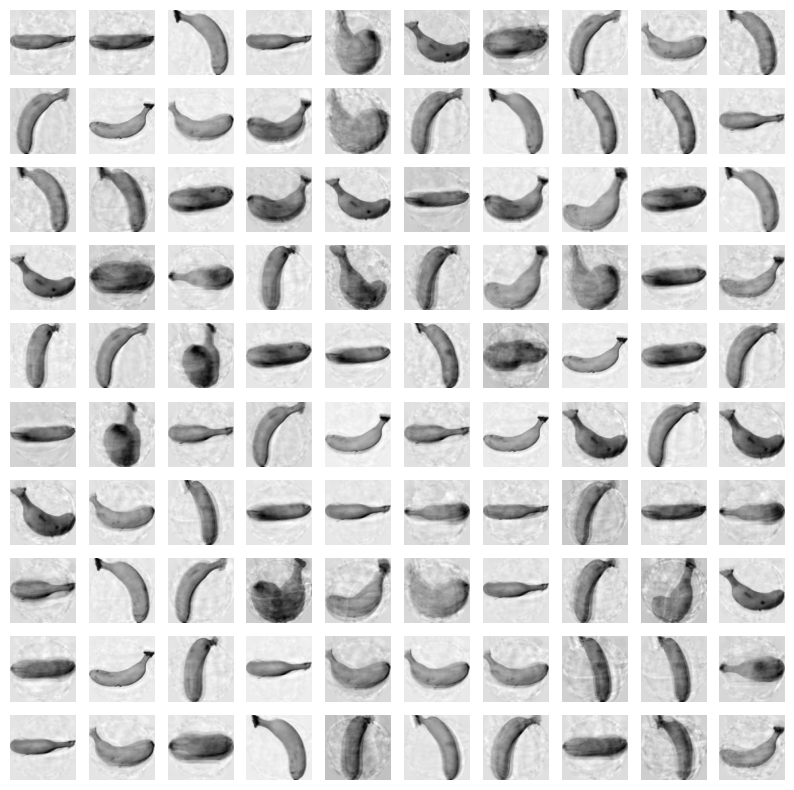

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

- 주성분을 최대로 사용한다면 완벽하게 원본 데이터를 재구성 할 수 있음.
- 50개의 특성은 얼마나 분산을 보존하고 있는지 다음에서 알아보자.

## 설명된 분산

- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값: <b>설명된 분산(explained variance)</b>
- PCA 클래스의 explained_variance_ratio 에 각 주성분의 설명된 분산 비율 확인 가능
- 첫번째 주성분의 설명된 분산이 가장 큰 값.
- 이 분산 비율을 모두 더하면 50개의 주성분이 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [10]:
print(np.sum(pca.explained_variance_ratio_))

0.9215616919484863


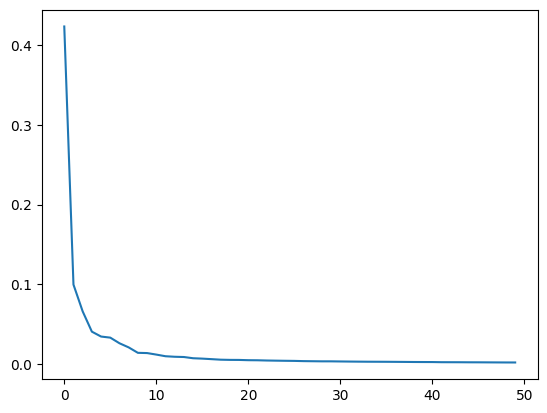

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 아래 그래프를 통해 첫 10개의 주성분이 대부분의 분산을 표현하는 것을 확인할 수 있음. 

## 다른 알고리즘과 함께 사용하기

- 과일 사진 원본 데이터와 pca로 축소한 데이터를 지도 학습에 적용해보고 어떤 차이가 있는지 확인해보기
- 3개의 과일사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용.

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [13]:
# 지도 학습 모델을 사용하려면 타깃값이 있어야 함. 
# 여기서 사과 = 0, 파인애플 = 1, 바나나 = 2 로 지정
# 파이썬 리스트 * 정수 => 리스트 안의 원소를 정수만큼 반복.
# 이를 이용해 사과(0), 파인애플(1), 바나나(2) 를 각각 100개로 구성된 타깃 데이터를 쉽게 만들 수 있다.

target = np.array([0]*100 + [1]*100 + [2]*100)

In [14]:
# 먼저 원본 데이터인 fruits_2d 사용.
# 로지스틱 회귀 모델에서 성능을 가늠하기 위해 cross_validate() 로 교차 검증 수행

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.5940886020660401


In [15]:
# 교차 검증의 점수는 약 0.997
# cross_validate() 함수가 반환하는 딕셔너리에는 fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록되어 있음.
# 이 값을 pca로 축소한 fruits_pca를 사용했을 때와 비교.

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.006703901290893555


In [16]:
# 50개의 특성만 사용했음에도 정확도 100% 기록.
# 훈련시간은 0.5940 => 0.0067으로 90배 이상 감소.
# => PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음.

# 앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했음.
# 원하는 설명된 분산의 비율을 입력할 수도 있음.
# PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음.
# 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 만들기

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [17]:
# 몇 개의 주성분을 찾았는지 확인
print(pca.n_components_)

2


In [18]:
# 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음.
# 이 모델로 원본 데이터를 변환. 주성분이 2개이므로 변환된 데이터의 크기는 (300, 2)가 될 것.

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [19]:
# 2개의 특성만 사용한 교차 검증의 결과 확인.

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.008657693862915039


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [20]:
# 2개의 특성만 사용해도 99% 정확도 달성.

# 이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자.

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


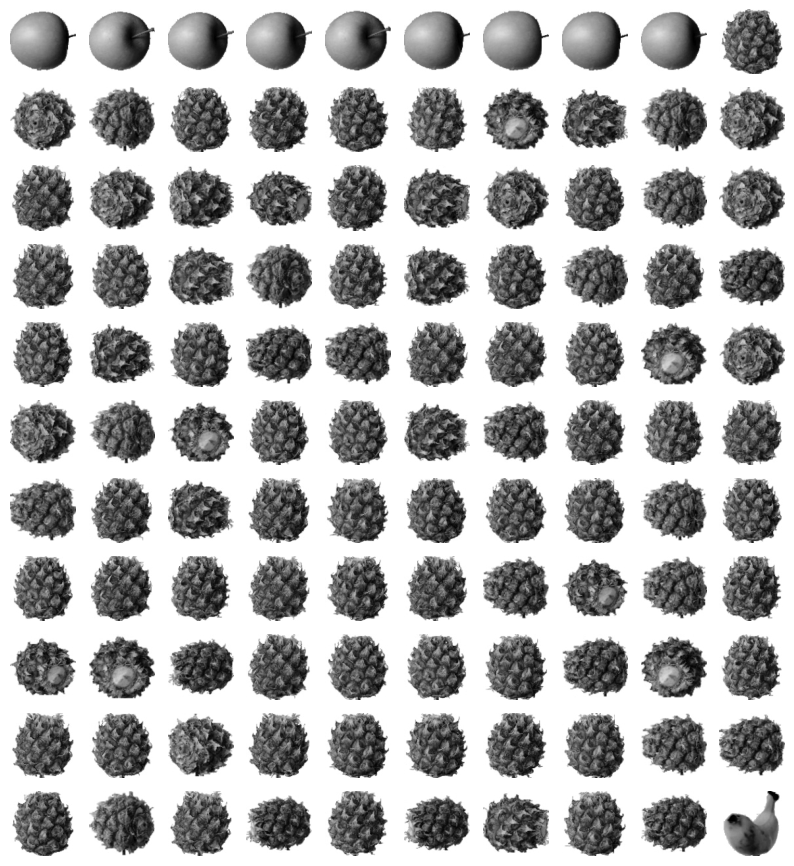

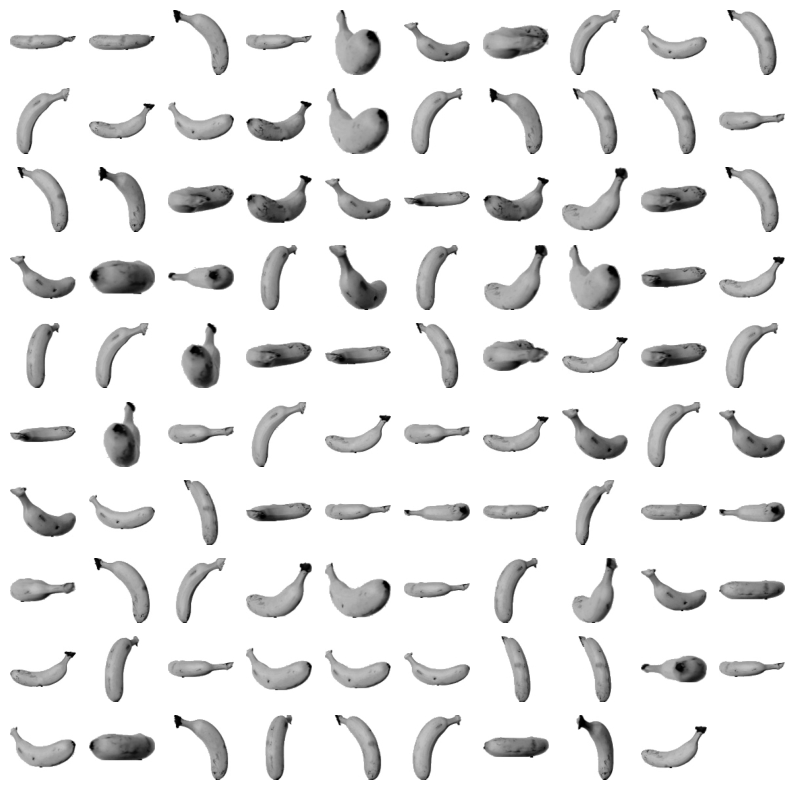

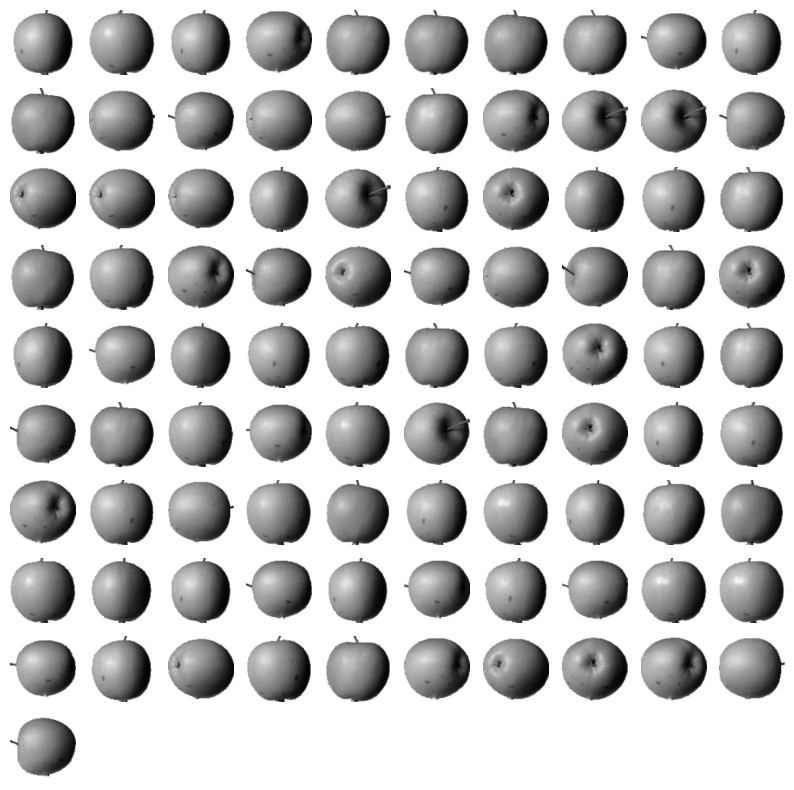

In [21]:
# KMeans가 찾은 레이블을 사용해 과일 이미지 출력

for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

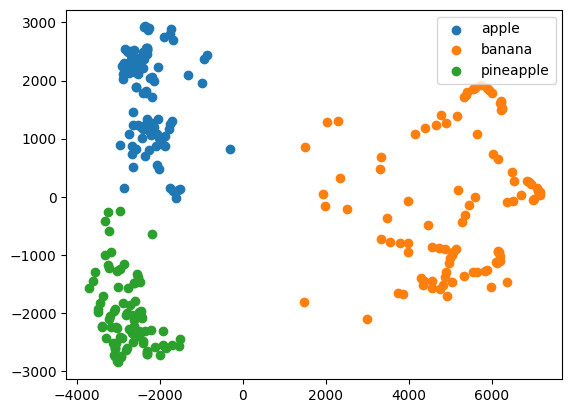

In [23]:
# 앞에서 찾은 km.labels_ 를 사용해 클러스터별로 나누어 산점도를 그려봄.

for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()